# Приведение к каноническому виду

Границы отрисовки графика

In [177]:
xmin = -10;
xmax = 10;
ymin = -10;
ymax = 10;
zmin = -10;
zmax = 10;

Задаем функцию

In [183]:
f[x_, y_, z_] = 7*x^2 + 3*y^2 + 3*z^2 +  8*x*y + 8*x*z + 6*y*z + 6*x + y + 7;

Строим график

-Graphics3D-
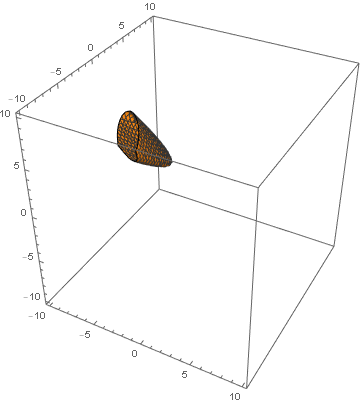

In [184]:
ContourPlot3D[f[x,y,z] == 0, {x, xmin, xmax}, {y, ymin, ymax}, {z, zmin, zmax}]

Задаем матрицу квадратичной формы и столбец коэффициентов линейной формы, а также сохраняем свободный член

In [185]:
matrix = {{7, 4, 4}, {4, 3, 3}, {4, 3, 3}};
a = {3, 0.5, 0};
a0 = 7;

Матрица в матричном виде

7   4   4

4   3   3

4   3   3
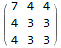

In [188]:
matrix // MatrixForm 

Столбец коэффициентов в матричном виде

3

0.5

0
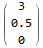

In [189]:
a // MatrixForm

Получение собственных значений, как видно собственные значения полученные через матричные операции равны собственным значениям
полученный при помощи стандартной функции Eigenvalues

In [190]:
evalues = N[Solve[Det[matrix-l*IdentityMatrix[3]] == 0, l][[All,1,2]]]
eigenvalues = N[Eigenvalues[matrix]]

{0., 0.821092, 12.1789}
{12.1789, 0.821092, 0.}

Получение собственных векторов, как видно собственные векторы полученные через матричные операции равны собственным значениям полученный при помощи стандартной функции Eigenvectors

In [192]:
evectors = {{0,0,0},{0,0,0},{0,0,0}};
For[i=1, i<4, i++,
    m = matrix - evalues[[i]]*IdentityMatrix[3];
    sol = {x, y, z} /. First[Solve[Thread[{m.{x, y, z} == {0, 0, 0}}], {x,y}]] /. z->1;
    Print[sol];
    evectors[[i]] = N[sol / Sqrt[Transpose[sol].sol]];]

{0., -1., 1}
{-1.29473, 1., 1}
{1.54473, 1., 1}


In [194]:
eigenvectors = N[Eigenvectors[matrix]];
For[i=1, i<4, i++,
    Print[eigenvectors[[4-i]]];]

{0., -1., 1.}
{-1.29473, 1., 1.}
{1.54473, 1., 1.}


Получаем нужные коэффициенты для канонической формы

In [196]:
resa = evectors.a

{-0.353553, -1.76501, 2.45148}

Канонический вид

In [199]:
resf[x_, y_, z_] = evalues[[3]]*x^2 + evalues[[2]]*y^2 + evalues[[1]]*z^2 + 2*resa[[2]]*x + 2*resa[[3]]*y + 2*resa[[1]]*z + a0;

Построим график

-Graphics3D-
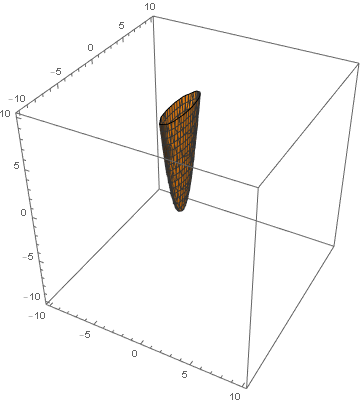

In [200]:
ContourPlot3D[resf[x,y,z] == 0, {x, xmin, xmax}, {y, ymin, ymax}, {z, zmin, zmax}]